# Fit polynomials 3
> Stay fit with polynomials plus a tour through named matrices. Part 3. 

In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plot
from numpy.random import default_rng
from sklearn.datasets import load_diabetes
import math

## Introduction

This is the third part of 'Fit with polynomials'. Check out [the first part](https://vanderzwaan.dev/2022/02/05/Fit-polynomials-1.html) and [the second part](https://vanderzwaan.dev/2022/05/06/Fit-polynomials-2.html).

In this post we'll look at the oscillating behaviour. You can see that fitting the Runge function with more sampling points  (and higher degree) becomes a better fit in the middle, but oscillates at the ends. This is known as the [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon).

In [2]:
# collapse
d = np.linspace(-1, 1, 101)

In [3]:
#collapse
def interpolate(f, x):
    M = np.vander(x, increasing=True)
    c = np.linalg.inv(M) @ f(x)
    return c

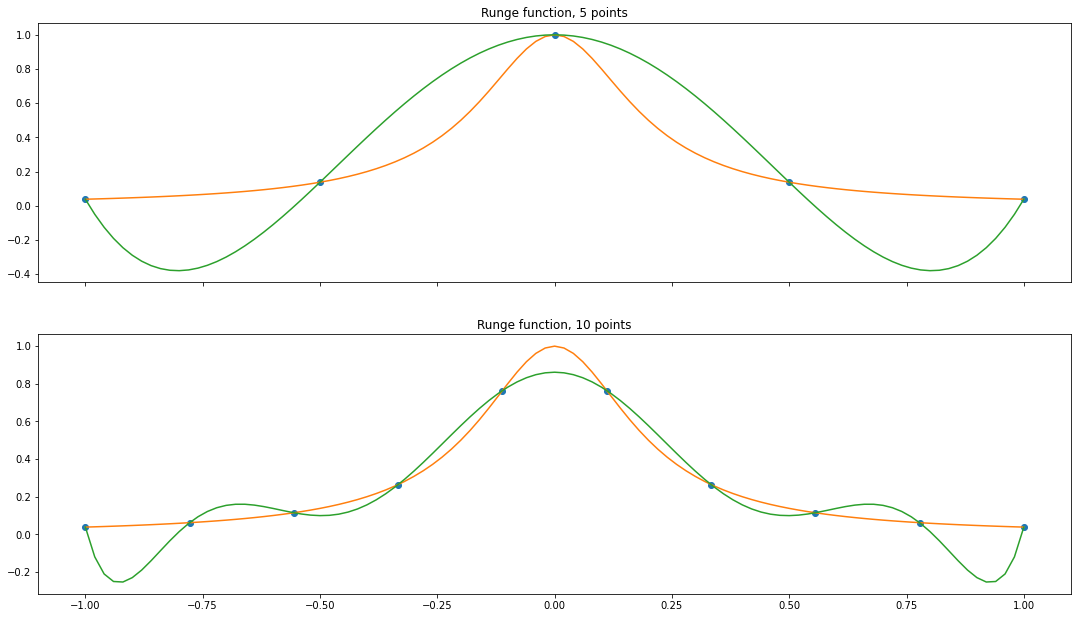

In [4]:
#collapse
fig, axs = plot.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)

x1 = np.linspace(-1, 1, 5)
runge = lambda x: 1/(1+(5*x)**2)

pf  = np.polynomial.Polynomial(interpolate(runge, x1))
axs[0].plot(x1, runge(x1), 'o')
axs[0].plot(d, runge(d), '-')
axs[0].plot(d, pf(d), '-')
axs[0].set_title('Runge function, 5 points')

x2 = np.linspace(-1, 1, 10)
pg  = np.polynomial.Polynomial(interpolate(runge, x2))
axs[1].plot(x2, runge(x2), 'o')
axs[1].plot(d, runge(d), '-')
axs[1].plot(d, pg(d), '-')
axs[1].set_title('Runge function, 10 points')
for ax in axs.flat:
    ax.label_outer()

## Non-regular sampling: the intuition
The idea that stuck with me was to imagine that the interpolation has a lot of freedom outside $[-1, 1]$. So by fixating points on regular intervals the points in the middle are controlled much more than at the edges. Given that we have to pick points within $[-1,1]$ we should sample more densily at the edges.

For example, we can pick $[-1, -0.8, -0.5, 0, 0.5, 0.8, 1]$ and compare to the equidistant case:

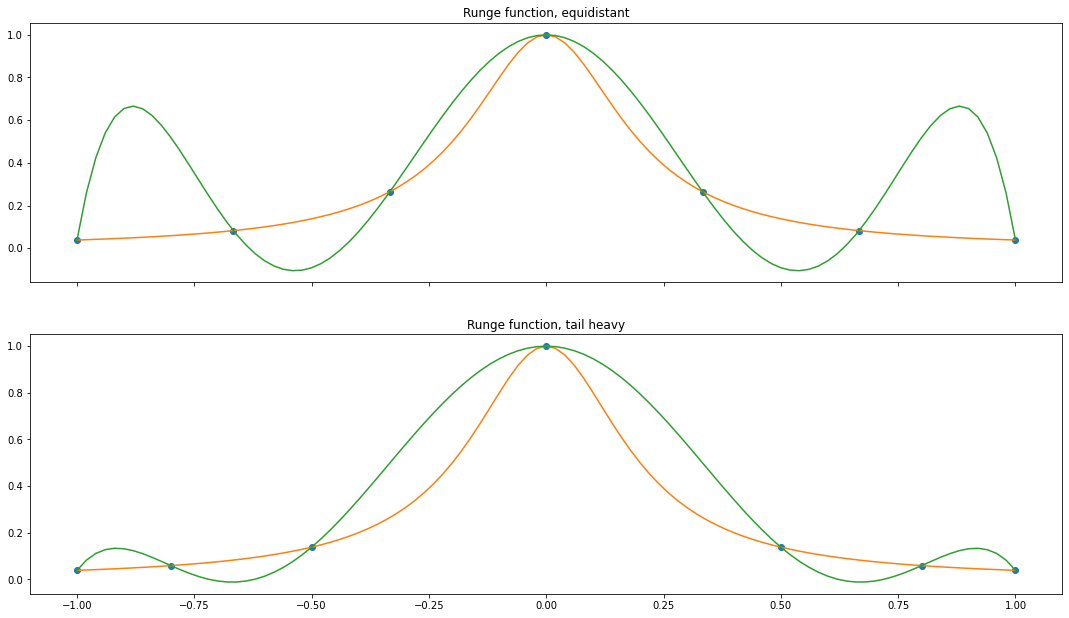

In [5]:
#collapse
fig, axs = plot.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)

x1 = np.linspace(-1, 1, 7)
runge = lambda x: 1/(1+(5*x)**2)

pf  = np.polynomial.Polynomial(interpolate(runge, x1))
axs[0].plot(x1, runge(x1), 'o')
axs[0].plot(d, runge(d), '-')
axs[0].plot(d, pf(d), '-')
axs[0].set_title('Runge function, equidistant')

x2 = np.array([-1, -0.8, -0.5, 0, 0.5, 0.8,  1])
pg  = np.polynomial.Polynomial(interpolate(runge, x2))
axs[1].plot(x2, runge(x2), 'o')
axs[1].plot(d, runge(d), '-')
axs[1].plot(d, pg(d), '-')
axs[1].set_title('Runge function, tail heavy')
for ax in axs.flat:
    ax.label_outer()

## Chebyshev nodes

Chebyshev nodes are exactly those points that minimize the maximum error when increasing the degree of the polynomials. They are defined as (here)[https://en.wikipedia.org/wiki/Chebyshev_nodes]. These are the roots of the Chebyshev polynomials (of the first kind). 

$$ x_k = \cos \left({\frac {2k-1}{2n}}\pi \right)$$

In [6]:
def chebyshev_nodes(n):
    return np.array([
        np.cos((2 * k - 1)/(2*n) * np.pi)
        for k in range(1, n+1)
    ])

In [7]:
chebyshev_nodes(7)

array([ 9.74927912e-01,  7.81831482e-01,  4.33883739e-01,  6.12323400e-17,
       -4.33883739e-01, -7.81831482e-01, -9.74927912e-01])

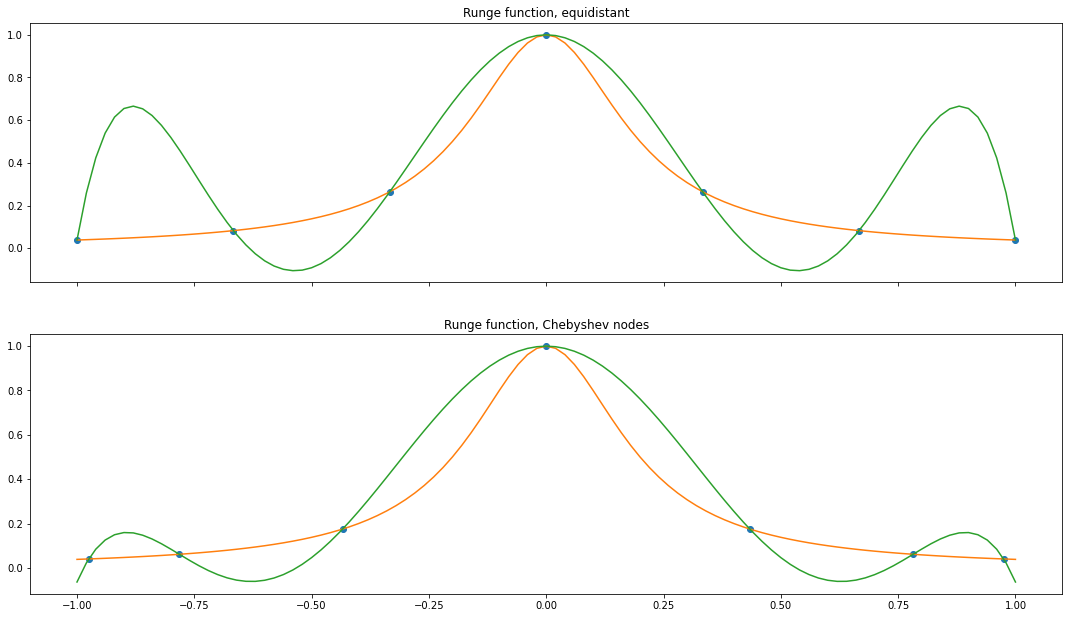

In [8]:
#collapse
fig, axs = plot.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)

x1 = np.linspace(-1, 1, 7)
runge = lambda x: 1/(1+(5*x)**2)

pf  = np.polynomial.Polynomial(interpolate(runge, x1))
axs[0].plot(x1, runge(x1), 'o')
axs[0].plot(d, runge(d), '-')
axs[0].plot(d, pf(d), '-')
axs[0].set_title('Runge function, equidistant')

x2 = chebyshev_nodes(7)
pg  = np.polynomial.Polynomial(interpolate(runge, x2))
axs[1].plot(x2, runge(x2), 'o')
axs[1].plot(d, runge(d), '-')
axs[1].plot(d, pg(d), '-')
axs[1].set_title('Runge function, Chebyshev nodes')
for ax in axs.flat:
    ax.label_outer()

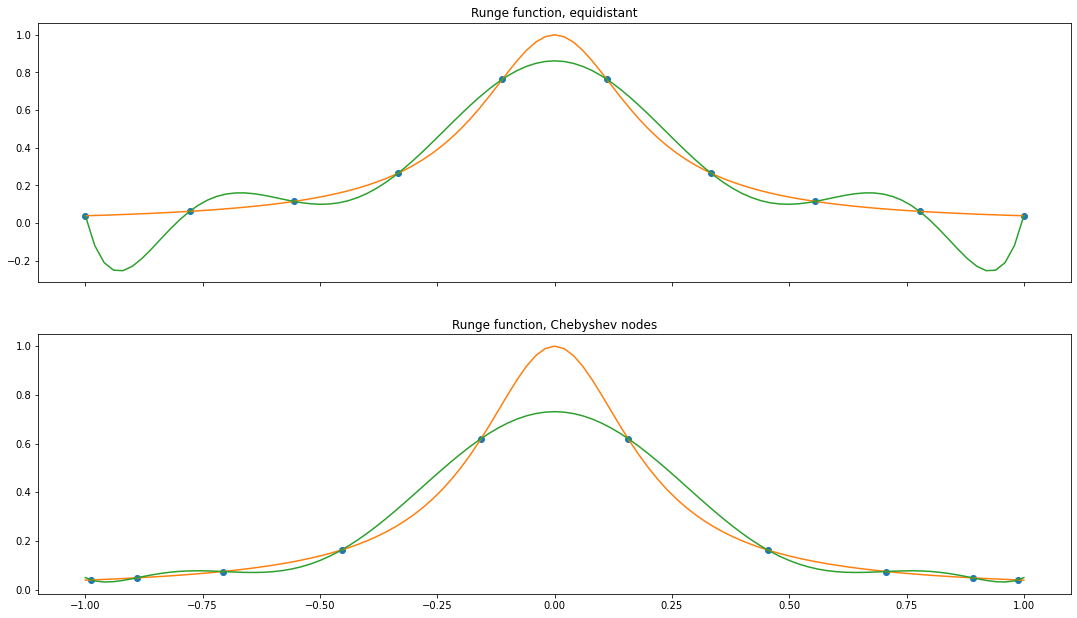

In [9]:
#collapse
fig, axs = plot.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)

x1 = np.linspace(-1, 1, 10)
runge = lambda x: 1/(1+(5*x)**2)

pf  = np.polynomial.Polynomial(interpolate(runge, x1))
axs[0].plot(x1, runge(x1), 'o')
axs[0].plot(d, runge(d), '-')
axs[0].plot(d, pf(d), '-')
axs[0].set_title('Runge function, equidistant')

x2 = chebyshev_nodes(10)
pg  = np.polynomial.Polynomial(interpolate(runge, x2))
axs[1].plot(x2, runge(x2), 'o')
axs[1].plot(d, runge(d), '-')
axs[1].plot(d, pg(d), '-')
axs[1].set_title('Runge function, Chebyshev nodes')
for ax in axs.flat:
    ax.label_outer()

## Conclusion
It's incredibly cool that with interpolating polynomials all these concepts from mathematics are tied together. For me it shows that theoretical mathematics should not be judged by its immediate utility.

Next time you take a sample think about whether uniform (equidistant) sampling actually makes sense. 